<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit1-Portfolio-Project/blob/main/Final_Analysis_Math_%26_RLA_Test_Scores_%26_Poverty_Estimates_2017_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
math_national = pd.read_csv('https://www2.ed.gov/about/inits/ed/edfacts/data-files/math-achievement-sch-sy2017-18.csv') #Convert into a DataFrame the National School-Level Math Achievements for 2017-2018 CSV file

math_national.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,15,17,19,21,23,25,27,29,31,32,33,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,213,215,217,219,221,223,225,227,229,231,233,235,236,237,239,241,243,245,247,249,251,253,254,255,256,257,258,259,260,261,262,263) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,MAS_MTH00NUMVALID_1718,MAS_MTH00PCTPROF_1718,MBL_MTH00NUMVALID_1718,MBL_MTH00PCTPROF_1718,MHI_MTH00NUMVALID_1718,MHI_MTH00PCTPROF_1718,MTR_MTH00NUMVALID_1718,MTR_MTH00PCTPROF_1718,MWH_MTH00NUMVALID_1718,MWH_MTH00PCTPROF_1718,F_MTH00NUMVALID_1718,F_MTH00PCTPROF_1718,M_MTH00NUMVALID_1718,M_MTH00PCTPROF_1718,CWD_MTH00NUMVALID_1718,CWD_MTH00PCTPROF_1718,ECD_MTH00NUMVALID_1718,ECD_MTH00PCTPROF_1718,FCS_MTH00NUMVALID_1718,FCS_MTH00PCTPROF_1718,LEP_MTH00NUMVALID_1718,LEP_MTH00PCTPROF_1718,HOM_MTH00NUMVALID_1718,HOM_MTH00PCTPROF_1718,MIG_MTH00NUMVALID_1718,MIG_MTH00PCTPROF_1718,MIL_MTH00NUMVALID_1718,...,HOM_MTH04NUMVALID_1718,HOM_MTH04PCTPROF_1718,HOM_MTH05NUMVALID_1718,HOM_MTH05PCTPROF_1718,HOM_MTH06NUMVALID_1718,HOM_MTH06PCTPROF_1718,HOM_MTH07NUMVALID_1718,HOM_MTH07PCTPROF_1718,HOM_MTH08NUMVALID_1718,HOM_MTH08PCTPROF_1718,HOM_MTHHSNUMVALID_1718,HOM_MTHHSPCTPROF_1718,MIG_MTH03NUMVALID_1718,MIG_MTH03PCTPROF_1718,MIG_MTH04NUMVALID_1718,MIG_MTH04PCTPROF_1718,MIG_MTH05NUMVALID_1718,MIG_MTH05PCTPROF_1718,MIG_MTH06NUMVALID_1718,MIG_MTH06PCTPROF_1718,MIG_MTH07NUMVALID_1718,MIG_MTH07PCTPROF_1718,MIG_MTH08NUMVALID_1718,MIG_MTH08PCTPROF_1718,MIG_MTHHSNUMVALID_1718,MIG_MTHHSPCTPROF_1718,MIL_MTH03NUMVALID_1718,MIL_MTH03PCTPROF_1718,MIL_MTH04NUMVALID_1718,MIL_MTH04PCTPROF_1718,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,10000500870,AL-101-0010,Albertville Middle School,27MAR19,802,47,NaN,NaN,5,PS,32,30-39,370,35,15,LT50,380,59,401,52,401,42,51,11-19,310,37,1,PS,81,6-9,9,LT50,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,4,PS,5,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GE50,14,GE50,NaN,NaN
1,ALABAMA,1,100005,AL-101,Albertville City,10000500871,AL-101-0020,Albertville High School,27MAR19,337,37,NaN,NaN,5,PS,11,LT50,149,15-19,4,PS,168,50-54,175,35-39,162,35-39,19,LE20,108,25-29,1,PS,52,LE10,3,PS,NaN,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,GE50
2,ALABAMA,1,100005,AL-101,Albertville City,10000500879,AL-101-0110,Evans Elementary School,27MAR19,851,37,1,PS,5,PS,23,21-39,441,29,19,21-39,362,48,420,37,431,38,46,20-29,368,29,1,PS,110,10-14,13,LT50,NaN,NaN,19,...,NaN,NaN,7,LT50,6,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,LT50,5,PS,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,AL-101,Albertville City,10000500889,AL-101-0200,Albertville Elementary School,27MAR19,902,53,4,PS,3,PS,32,20-29,447,46,33,50-59,383,63,448,51,454,55,80,20-24,408,47,6,LT50,185,25-29,12,GE50,NaN,NaN,22,...,6,GE50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,GE50,10,GE50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,AL-048,Marshall County,10000600193,AL-048-0143,Kate Duncan Smith DAR Middle,27MAR19,434,56,1,PS,5,PS,3,PS,11,LT50,20,40-59,394,57,207,60-64,227,50-54,64,15-19,247,45-49,3,PS,3,PS,12,GE50,NaN,NaN,NaN,...,NaN,NaN,2,PS,7,GE50,1,PS,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
GA_condition_math = math_national['STNAM'] == 'GEORGIA' #Set state name to Georgia from the National School-Level Math Achievements for 2017-2018 CSV file

math_GA = math_national[GA_condition_math] #Create DataFrame with only Georgia Schools from the National School-Level Math Achievements for 2017-2018 CSV file

math_GA.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,MAS_MTH00NUMVALID_1718,MAS_MTH00PCTPROF_1718,MBL_MTH00NUMVALID_1718,MBL_MTH00PCTPROF_1718,MHI_MTH00NUMVALID_1718,MHI_MTH00PCTPROF_1718,MTR_MTH00NUMVALID_1718,MTR_MTH00PCTPROF_1718,MWH_MTH00NUMVALID_1718,MWH_MTH00PCTPROF_1718,F_MTH00NUMVALID_1718,F_MTH00PCTPROF_1718,M_MTH00NUMVALID_1718,M_MTH00PCTPROF_1718,CWD_MTH00NUMVALID_1718,CWD_MTH00PCTPROF_1718,ECD_MTH00NUMVALID_1718,ECD_MTH00PCTPROF_1718,FCS_MTH00NUMVALID_1718,FCS_MTH00PCTPROF_1718,LEP_MTH00NUMVALID_1718,LEP_MTH00PCTPROF_1718,HOM_MTH00NUMVALID_1718,HOM_MTH00PCTPROF_1718,MIG_MTH00NUMVALID_1718,MIG_MTH00PCTPROF_1718,MIL_MTH00NUMVALID_1718,...,HOM_MTH04NUMVALID_1718,HOM_MTH04PCTPROF_1718,HOM_MTH05NUMVALID_1718,HOM_MTH05PCTPROF_1718,HOM_MTH06NUMVALID_1718,HOM_MTH06PCTPROF_1718,HOM_MTH07NUMVALID_1718,HOM_MTH07PCTPROF_1718,HOM_MTH08NUMVALID_1718,HOM_MTH08PCTPROF_1718,HOM_MTHHSNUMVALID_1718,HOM_MTHHSPCTPROF_1718,MIG_MTH03NUMVALID_1718,MIG_MTH03PCTPROF_1718,MIG_MTH04NUMVALID_1718,MIG_MTH04PCTPROF_1718,MIG_MTH05NUMVALID_1718,MIG_MTH05PCTPROF_1718,MIG_MTH06NUMVALID_1718,MIG_MTH06PCTPROF_1718,MIG_MTH07NUMVALID_1718,MIG_MTH07PCTPROF_1718,MIG_MTH08NUMVALID_1718,MIG_MTH08PCTPROF_1718,MIG_MTHHSNUMVALID_1718,MIG_MTHHSPCTPROF_1718,MIL_MTH03NUMVALID_1718,MIL_MTH03PCTPROF_1718,MIL_MTH04NUMVALID_1718,MIL_MTH04PCTPROF_1718,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
21646,GEORGIA,13,1300001,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,27MAR19,904,32,2,PS,22,GE80,435,16,82,25-29,34,30-39,329,50,452,35,452,29,87,20-24,624,21,1,PS,32,11-19,16,LE20,2,PS,NaN,...,NaN,NaN,NaN,NaN,7,LT50,7,LT50,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21647,GEORGIA,13,1300001,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,27MAR19,294,59,1,PS,8,GE50,57,20-29,38,50-59,11,LT50,179,70-74,141,45-49,153,65-69,46,50-59,118,35-39,1,PS,19,21-39,5,PS,2,PS,NaN,...,1,PS,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21648,GEORGIA,13,1300001,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,27MAR19,575,41,1,PS,28,GE80,231,15-19,37,20-29,21,21-39,257,60-64,275,40-44,300,40-44,39,11-19,301,20,5,PS,17,21-39,4,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21649,GEORGIA,13,1300001,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,27MAR19,163,6-9,NaN,NaN,NaN,NaN,149,6-9,2,PS,7,LT50,5,PS,73,6-9,90,6-9,18,LE20,163,6-9,NaN,NaN,1,PS,1,PS,NaN,NaN,NaN,...,NaN,NaN,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21650,GEORGIA,13,1300001,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,27MAR19,194,60-64,NaN,NaN,11,GE50,28,40-59,11,GE50,8,GE50,136,60-64,97,55-59,97,65-69,27,LE20,93,50-54,6,GE50,2,PS,2,PS,NaN,NaN,NaN,...,1,PS,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
math_GA.shape

(2206, 265)

In [5]:
rla_national = pd.read_csv('https://www2.ed.gov/about/inits/ed/edfacts/data-files/rla-achievement-sch-sy2017-18.csv') #Create DataFrame for National School-Level Reading and Language Achievements for 2017-2018 CSV file

rla_national.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,15,17,19,21,23,25,27,29,31,32,33,35,37,38,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,213,215,217,219,221,223,225,227,229,231,233,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718,MAM_RLA00NUMVALID_1718,MAM_RLA00PCTPROF_1718,MAS_RLA00NUMVALID_1718,MAS_RLA00PCTPROF_1718,MBL_RLA00NUMVALID_1718,MBL_RLA00PCTPROF_1718,MHI_RLA00NUMVALID_1718,MHI_RLA00PCTPROF_1718,MTR_RLA00NUMVALID_1718,MTR_RLA00PCTPROF_1718,MWH_RLA00NUMVALID_1718,MWH_RLA00PCTPROF_1718,F_RLA00NUMVALID_1718,F_RLA00PCTPROF_1718,M_RLA00NUMVALID_1718,M_RLA00PCTPROF_1718,CWD_RLA00NUMVALID_1718,CWD_RLA00PCTPROF_1718,ECD_RLA00NUMVALID_1718,ECD_RLA00PCTPROF_1718,FCS_RLA00NUMVALID_1718,FCS_RLA00PCTPROF_1718,LEP_RLA00NUMVALID_1718,LEP_RLA00PCTPROF_1718,HOM_RLA00NUMVALID_1718,HOM_RLA00PCTPROF_1718,MIG_RLA00NUMVALID_1718,MIG_RLA00PCTPROF_1718,MIL_RLA00NUMVALID_1718,...,HOM_RLA04NUMVALID_1718,HOM_RLA04PCTPROF_1718,HOM_RLA05NUMVALID_1718,HOM_RLA05PCTPROF_1718,HOM_RLA06NUMVALID_1718,HOM_RLA06PCTPROF_1718,HOM_RLA07NUMVALID_1718,HOM_RLA07PCTPROF_1718,HOM_RLA08NUMVALID_1718,HOM_RLA08PCTPROF_1718,HOM_RLAHSNUMVALID_1718,HOM_RLAHSPCTPROF_1718,MIG_RLA03NUMVALID_1718,MIG_RLA03PCTPROF_1718,MIG_RLA04NUMVALID_1718,MIG_RLA04PCTPROF_1718,MIG_RLA05NUMVALID_1718,MIG_RLA05PCTPROF_1718,MIG_RLA06NUMVALID_1718,MIG_RLA06PCTPROF_1718,MIG_RLA07NUMVALID_1718,MIG_RLA07PCTPROF_1718,MIG_RLA08NUMVALID_1718,MIG_RLA08PCTPROF_1718,MIG_RLAHSNUMVALID_1718,MIG_RLAHSPCTPROF_1718,MIL_RLA03NUMVALID_1718,MIL_RLA03PCTPROF_1718,MIL_RLA04NUMVALID_1718,MIL_RLA04PCTPROF_1718,MIL_RLA05NUMVALID_1718,MIL_RLA05PCTPROF_1718,MIL_RLA06NUMVALID_1718,MIL_RLA06PCTPROF_1718,MIL_RLA07NUMVALID_1718,MIL_RLA07PCTPROF_1718,MIL_RLA08NUMVALID_1718,MIL_RLA08PCTPROF_1718,MIL_RLAHSNUMVALID_1718,MIL_RLAHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,10000500870,AL-101-0010,Albertville Middle School,27MAR19,801,43,NaN,NaN,5,PS,32,30-39,370,26,15,LT50,379,61,400,49,401,38,51,11-19,309,30,1,PS,81,LE5,8,LT50,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,3,PS,5,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GE50,14,GE50,NaN,NaN
1,ALABAMA,1,100005,AL-101,Albertville City,10000500871,AL-101-0020,Albertville High School,27MAR19,337,32,NaN,NaN,5,PS,11,LT50,149,10-14,4,PS,168,50-54,175,30-34,162,30-34,19,LE20,108,20-24,1,PS,52,LE10,3,PS,NaN,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,GE50
2,ALABAMA,1,100005,AL-101,Albertville City,10000500879,AL-101-0110,Evans Elementary School,27MAR19,848,34,1,PS,5,PS,23,21-39,437,17,19,21-39,363,53,418,35,430,32,47,11-19,365,24,1,PS,106,LE5,10,LT50,NaN,NaN,19,...,NaN,NaN,6,LT50,4,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,LT50,5,PS,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,AL-101,Albertville City,10000500889,AL-101-0200,Albertville Elementary School,27MAR19,899,41,4,PS,3,PS,32,30-39,443,24,33,40-49,384,59,445,44,454,38,80,15-19,406,29,6,LT50,181,LE5,11,LT50,NaN,NaN,22,...,6,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,GE50,10,GE50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,AL-048,Marshall County,10000600193,AL-048-0143,Kate Duncan Smith DAR Middle,27MAR19,433,52,1,PS,5,PS,3,PS,11,LT50,20,21-39,393,54,207,55-59,226,45-49,63,10-14,246,40-44,3,PS,3,PS,11,LT50,NaN,NaN,NaN,...,NaN,NaN,2,PS,6,GE50,1,PS,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
GA_condition_rla = rla_national['STNAM'] == 'GEORGIA' #Set State Name to Georgia for the National School-Level Reading and Language Achievements for 2017-2018 CSV file

rla_GA = rla_national[GA_condition_rla] #Create DataFrame with only Georgia schools from the National School-Level Reading and Language Achievements for 2017-2018 CSV file

rla_GA.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718,MAM_RLA00NUMVALID_1718,MAM_RLA00PCTPROF_1718,MAS_RLA00NUMVALID_1718,MAS_RLA00PCTPROF_1718,MBL_RLA00NUMVALID_1718,MBL_RLA00PCTPROF_1718,MHI_RLA00NUMVALID_1718,MHI_RLA00PCTPROF_1718,MTR_RLA00NUMVALID_1718,MTR_RLA00PCTPROF_1718,MWH_RLA00NUMVALID_1718,MWH_RLA00PCTPROF_1718,F_RLA00NUMVALID_1718,F_RLA00PCTPROF_1718,M_RLA00NUMVALID_1718,M_RLA00PCTPROF_1718,CWD_RLA00NUMVALID_1718,CWD_RLA00PCTPROF_1718,ECD_RLA00NUMVALID_1718,ECD_RLA00PCTPROF_1718,FCS_RLA00NUMVALID_1718,FCS_RLA00PCTPROF_1718,LEP_RLA00NUMVALID_1718,LEP_RLA00PCTPROF_1718,HOM_RLA00NUMVALID_1718,HOM_RLA00PCTPROF_1718,MIG_RLA00NUMVALID_1718,MIG_RLA00PCTPROF_1718,MIL_RLA00NUMVALID_1718,...,HOM_RLA04NUMVALID_1718,HOM_RLA04PCTPROF_1718,HOM_RLA05NUMVALID_1718,HOM_RLA05PCTPROF_1718,HOM_RLA06NUMVALID_1718,HOM_RLA06PCTPROF_1718,HOM_RLA07NUMVALID_1718,HOM_RLA07PCTPROF_1718,HOM_RLA08NUMVALID_1718,HOM_RLA08PCTPROF_1718,HOM_RLAHSNUMVALID_1718,HOM_RLAHSPCTPROF_1718,MIG_RLA03NUMVALID_1718,MIG_RLA03PCTPROF_1718,MIG_RLA04NUMVALID_1718,MIG_RLA04PCTPROF_1718,MIG_RLA05NUMVALID_1718,MIG_RLA05PCTPROF_1718,MIG_RLA06NUMVALID_1718,MIG_RLA06PCTPROF_1718,MIG_RLA07NUMVALID_1718,MIG_RLA07PCTPROF_1718,MIG_RLA08NUMVALID_1718,MIG_RLA08PCTPROF_1718,MIG_RLAHSNUMVALID_1718,MIG_RLAHSPCTPROF_1718,MIL_RLA03NUMVALID_1718,MIL_RLA03PCTPROF_1718,MIL_RLA04NUMVALID_1718,MIL_RLA04PCTPROF_1718,MIL_RLA05NUMVALID_1718,MIL_RLA05PCTPROF_1718,MIL_RLA06NUMVALID_1718,MIL_RLA06PCTPROF_1718,MIL_RLA07NUMVALID_1718,MIL_RLA07PCTPROF_1718,MIL_RLA08NUMVALID_1718,MIL_RLA08PCTPROF_1718,MIL_RLAHSNUMVALID_1718,MIL_RLAHSPCTPROF_1718
21664,GEORGIA,13,1300001,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,27MAR19,908,30,2,PS,23,40-59,436,17,82,20-24,35,30-39,330,47,454,37,454,22,87,25-29,627,20,1,PS,32,LE10,16,LE20,2,PS,NaN,...,NaN,NaN,NaN,NaN,7,LT50,7,LT50,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21665,GEORGIA,13,1300001,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,27MAR19,294,55,1,PS,8,GE50,57,20-29,38,30-39,11,LT50,179,65-69,141,50-54,153,55-59,46,40-49,118,30-34,1,PS,19,LE20,5,PS,2,PS,NaN,...,1,PS,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21666,GEORGIA,13,1300001,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,27MAR19,243,35,1,PS,9,LT50,121,15-19,16,21-39,11,LT50,85,55-59,124,35-39,119,30-34,23,21-39,141,20-24,2,PS,2,PS,1,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21667,GEORGIA,13,1300001,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,27MAR19,163,6-9,NaN,NaN,NaN,NaN,149,6-9,2,PS,7,LT50,5,PS,73,10-14,90,6-9,18,LE20,163,6-9,NaN,NaN,1,PS,1,PS,NaN,NaN,NaN,...,NaN,NaN,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21668,GEORGIA,13,1300001,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,27MAR19,194,35-39,NaN,NaN,11,GE50,28,LE20,11,LT50,8,LT50,136,35-39,97,35-39,97,30-34,27,LE20,93,25-29,6,GE50,2,PS,2,PS,NaN,NaN,NaN,...,1,PS,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rla_GA.shape

(2197, 265)

In [8]:
poverty_nat = pd.read_csv('https://opendata.arcgis.com/datasets/82561a1eb6914fa1ac7581520b97bd42_0.csv?outSR=%7B%22latestWkid%22%3A4269%2C%22wkid%22%3A4269%7D') #Convert into a DataFrame the National School Neighborhood Poverty Estimates for 2017-2018 CSV

poverty_nat.head()

,X,Y,NCESSCH,NAME,IPR_EST,IPR_SE,OBJECTID_1,LAT,LON,SCHOOLYEAR
0,-86.206174,34.260194,10000500870,Albertville Middle School,245,80,1,34.260194,-86.206174,2017-2018
1,-86.204884,34.262226,10000500871,Albertville High School,248,80,2,34.262226,-86.204884,2017-2018
2,-86.220144,34.273318,10000500879,Evans Elementary School,174,91,3,34.273318,-86.220144,2017-2018
3,-86.221834,34.253251,10000500889,Albertville Elementary School,236,105,4,34.253251,-86.221834,2017-2018
4,-86.193289,34.289849,10000501616,Big Spring Lake Kindergarten School,480,120,5,34.289849,-86.193289,2017-2018


In [9]:
final_math_GA = pd.merge(math_GA, poverty_nat, how = 'inner', on = 'NCESSCH') #Combine Georgia schools Math Achievements with Poverty Estimates for 2017-2018

final_math_GA.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,MAS_MTH00NUMVALID_1718,MAS_MTH00PCTPROF_1718,MBL_MTH00NUMVALID_1718,MBL_MTH00PCTPROF_1718,MHI_MTH00NUMVALID_1718,MHI_MTH00PCTPROF_1718,MTR_MTH00NUMVALID_1718,MTR_MTH00PCTPROF_1718,MWH_MTH00NUMVALID_1718,MWH_MTH00PCTPROF_1718,F_MTH00NUMVALID_1718,F_MTH00PCTPROF_1718,M_MTH00NUMVALID_1718,M_MTH00PCTPROF_1718,CWD_MTH00NUMVALID_1718,CWD_MTH00PCTPROF_1718,ECD_MTH00NUMVALID_1718,ECD_MTH00PCTPROF_1718,FCS_MTH00NUMVALID_1718,FCS_MTH00PCTPROF_1718,LEP_MTH00NUMVALID_1718,LEP_MTH00PCTPROF_1718,HOM_MTH00NUMVALID_1718,HOM_MTH00PCTPROF_1718,MIG_MTH00NUMVALID_1718,MIG_MTH00PCTPROF_1718,MIL_MTH00NUMVALID_1718,...,HOM_MTH08PCTPROF_1718,HOM_MTHHSNUMVALID_1718,HOM_MTHHSPCTPROF_1718,MIG_MTH03NUMVALID_1718,MIG_MTH03PCTPROF_1718,MIG_MTH04NUMVALID_1718,MIG_MTH04PCTPROF_1718,MIG_MTH05NUMVALID_1718,MIG_MTH05PCTPROF_1718,MIG_MTH06NUMVALID_1718,MIG_MTH06PCTPROF_1718,MIG_MTH07NUMVALID_1718,MIG_MTH07PCTPROF_1718,MIG_MTH08NUMVALID_1718,MIG_MTH08PCTPROF_1718,MIG_MTHHSNUMVALID_1718,MIG_MTHHSPCTPROF_1718,MIL_MTH03NUMVALID_1718,MIL_MTH03PCTPROF_1718,MIL_MTH04NUMVALID_1718,MIL_MTH04PCTPROF_1718,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718,X,Y,NAME,IPR_EST,IPR_SE,OBJECTID_1,LAT,LON,SCHOOLYEAR
0,GEORGIA,13,1300001,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,27MAR19,904,32,2,PS,22,GE80,435,16,82,25-29,34,30-39,329,50,452,35,452,29,87,20-24,624,21,1,PS,32,11-19,16,LE20,2,PS,NaN,...,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.984392,33.068221,Gardner-Newman Middle School,206,56,24088,33.068221,-84.984392,2017-2018
1,GEORGIA,13,1300001,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,27MAR19,294,59,1,PS,8,GE50,57,20-29,38,50-59,11,LT50,179,70-74,141,45-49,153,65-69,46,50-59,118,35-39,1,PS,19,21-39,5,PS,2,PS,NaN,...,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.056615,33.055284,Hollis Hand Elementary School,356,88,24089,33.055284,-85.056615,2017-2018
2,GEORGIA,13,1300001,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,27MAR19,575,41,1,PS,28,GE80,231,15-19,37,20-29,21,21-39,257,60-64,275,40-44,300,40-44,39,11-19,301,20,5,PS,17,21-39,4,PS,NaN,NaN,NaN,...,NaN,4,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.034401,33.046046,LaGrange High School,178,43,24090,33.046046,-85.034401,2017-2018
3,GEORGIA,13,1300001,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,27MAR19,163,6-9,NaN,NaN,NaN,NaN,149,6-9,2,PS,7,LT50,5,PS,73,6-9,90,6-9,18,LE20,163,6-9,NaN,NaN,1,PS,1,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.045694,33.021475,Berta Weathersbee Elementary School,122,23,24091,33.021475,-85.045694,2017-2018
4,GEORGIA,13,1300001,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,27MAR19,194,60-64,NaN,NaN,11,GE50,28,40-59,11,GE50,8,GE50,136,60-64,97,55-59,97,65-69,27,LE20,93,50-54,6,GE50,2,PS,2,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.038241,33.122700,Hillcrest Elementary School,368,115,24092,33.122700,-85.038241,2017-2018


In [10]:
final_math_GA.shape

(2206, 274)

In [11]:
an_final_math_GA = final_math_GA[['ST_LEAID', 'LEANM', 'NCESSCH', 'ST_SCHID',	'SCHNAM', 'ALL_MTH00PCTPROF_1718', 'NAME', 'IPR_EST',	'IPR_SE']] #Isolate columns for analysis in the Final DataFrame for Georgia schools Math Achievements with Poverty Estimates for 2017-2018
 
an_final_math_GA.head()

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_MTH00PCTPROF_1718,NAME,IPR_EST,IPR_SE
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,32,Gardner-Newman Middle School,206,56
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,59,Hollis Hand Elementary School,356,88
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,41,LaGrange High School,178,43
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,60-64,Hillcrest Elementary School,368,115


In [12]:
an_final_math_GA.shape

(2206, 9)

In [13]:
with pd.option_context('display.max_rows', 2206):
    print (an_final_math_GA['ALL_MTH00PCTPROF_1718'].value_counts())

42       48
36       48
40       44
29       42
35       42
41       42
44       41
38       40
31       40
39       39
49       39
43       39
22       34
37       34
33       34
50       34
32       34
20-24    33
34       33
48       33
30       32
20       32
25       31
51       30
15-19    30
52       29
27       29
23       28
45       27
28       27
15       27
47       27
46       27
24       26
19       26
60       25
25-29    25
56       25
55       24
40-44    23
21       23
35-39    23
58       23
54       23
14       22
26       22
59       21
62       21
10-14    21
61       20
68       19
67       19
17       19
18       19
10       19
53       18
57       18
65       18
13       18
LE20     17
30-34    17
12       17
45-49    16
66       16
55-59    16
63       15
16       15
69       14
11       14
70       14
LE5      13
75       13
80       13
LE10     13
73       13
60-64    12
50-54    12
6-9      12
64       12
5        12
LT50     12
72       11
74       11
71  

In [14]:
an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'] = an_final_math_GA['ALL_MTH00PCTPROF_1718'] #Create a Clean Column for the Percentage Proficient Column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
an_final_math_GA.head()

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_MTH00PCTPROF_1718,NAME,IPR_EST,IPR_SE,Clean_ALL_MTH00PCTPROF_1718
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,32,Gardner-Newman Middle School,206,56,32
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,59,Hollis Hand Elementary School,356,88,59
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,41,LaGrange High School,178,43,41
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23,6-9
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,60-64,Hillcrest Elementary School,368,115,60-64


In [16]:
def clean_data(x): #Function to clean the data by replacing the range strings with an integer of the mean of the range & the LE/LT/GE/GT values with an integer of the numeric value
  import numpy as np
  
  if x.find('-') > 0: #Check if value contains '-'
    y = x.split('-') #If value contains '-', creates a list of 2 string elements split at the '-' in the initial string
      
    y_int = [0, 0]  
  
    for i in range(0, len(y)): #Transforms y string list into an integer list
      y_int[i] = int(y[i])
    
    y_final = int(np.arange(y_int[0], (y_int[1] + 1), 1).mean()) #Calculate the integer of the mean of the interval of the two elements in the integer list
    
    return y_final #Returns the new integer value

  elif x.find('LE') >= 0: #Check if value contains 'LE' to locate the LE-type string values
    k = x.lstrip('LE') #Strips leading letters from string
    
    return int(k) #Returns the new integer value

  elif x.find('GE') >= 0: #Check if value contains 'GE' to locate the GE-type string values
    k = x.lstrip('GE') #Strips leading letters from string
  
    return int(k) #Returns the new integer value

  elif x.find('LT') >= 0: #Check if value contains 'LT' to locate the LT-type string values
    k = x.lstrip('LT') #Strips leading letters from string
    
    return int(k) #Returns the new integer value

  elif x.find('GT') >= 0: #Check if value contains 'GT' to locate the GT-type string values
    k = x.lstrip('GT') #Strips leading letters from string
   
    return int(k) #Returns the new integer value

  else:

    return int(x) #Returns the new integer value


In [17]:
an_final_math_GA.drop(an_final_math_GA[an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'] == 'PS'].index, inplace = True)  #clean 'PS' values by dropping observations with 'PS' in the Clean_ALL_MTH00PCTPROF_1718 column
                                                    
with pd.option_context('display.max_rows', 2206):
    print (an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'].value_counts())


42       48
36       48
40       44
29       42
41       42
35       42
44       41
31       40
38       40
43       39
49       39
39       39
37       34
32       34
50       34
33       34
22       34
34       33
48       33
20-24    33
30       32
20       32
25       31
51       30
15-19    30
52       29
27       29
23       28
47       27
46       27
28       27
45       27
15       27
24       26
19       26
60       25
25-29    25
56       25
55       24
40-44    23
21       23
35-39    23
54       23
58       23
14       22
26       22
10-14    21
59       21
62       21
61       20
67       19
10       19
18       19
68       19
17       19
65       18
57       18
53       18
13       18
12       17
30-34    17
LE20     17
45-49    16
66       16
55-59    16
16       15
63       15
70       14
11       14
69       14
80       13
73       13
LE5      13
75       13
LE10     13
64       12
50-54    12
6-9      12
60-64    12
5        12
LT50     12
74       11
71       11
72  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'].isna().sum() #Check for NaN values in the in the Clean_ALL_MTH00PCTPROF_1718 column

0

In [19]:
an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'] = an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'].apply(clean_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
an_final_math_GA.head(50)

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_MTH00PCTPROF_1718,NAME,IPR_EST,IPR_SE,Clean_ALL_MTH00PCTPROF_1718
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,32,Gardner-Newman Middle School,206,56,32
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,59,Hollis Hand Elementary School,356,88,59
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,41,LaGrange High School,178,43,41
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23,7
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,60-64,Hillcrest Elementary School,368,115,62
5,GA-741,Troup County,130000101710,GA-741-5050,Rosemont Elementary School,49,Rosemont Elementary School,307,86,49
6,GA-741,Troup County,130000101852,GA-741-0297,Long Cane Middle School,37,Long Cane Middle School,182,71,37
7,GA-741,Troup County,130000101853,GA-741-0397,Hogansville Elementary School,15,Hogansville Elementary School,188,67,15
8,GA-741,Troup County,130000101855,GA-741-0497,Whitesville Road Elementary School,35,Whitesville Road Elementary School,124,51,35
9,GA-741,Troup County,130000101856,GA-741-0597,Ethel W. Kight Elementary School,25,Ethel W. Kight Elementary School,157,30,25


In [21]:
with pd.option_context('display.max_rows', 2206):
    print (an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'].value_counts())

42    71
22    67
37    57
27    54
32    51
20    49
17    49
36    48
50    47
40    44
47    43
29    42
35    42
41    42
44    42
52    41
31    40
38    40
39    39
49    39
43    39
12    38
57    34
33    34
48    33
30    33
62    33
34    33
10    32
25    31
51    30
24    30
23    28
15    28
46    27
45    27
28    27
19    26
56    25
60    25
5     25
67    25
55    24
21    23
58    23
54    23
14    22
26    22
59    21
61    20
68    19
18    19
13    18
53    18
65    18
7     17
66    16
72    15
16    15
63    15
11    14
70    14
80    14
69    14
75    13
64    13
73    13
71    11
74    11
8     10
9     10
77    10
79     9
78     9
76     8
6      8
81     8
85     5
86     4
84     4
82     4
83     4
88     3
3      3
1      3
89     3
91     3
4      2
98     2
2      2
92     2
96     2
87     2
90     1
93     1
99     1
Name: Clean_ALL_MTH00PCTPROF_1718, dtype: int64


In [22]:
an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'].dtypes

dtype('int64')

In [23]:
an_final_math_GA['IPR_EST'].dtypes

dtype('int64')

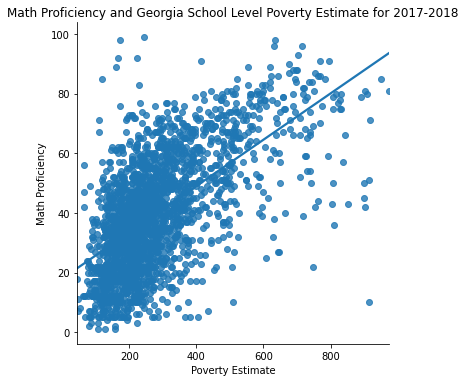

In [24]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = an_final_math_GA, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

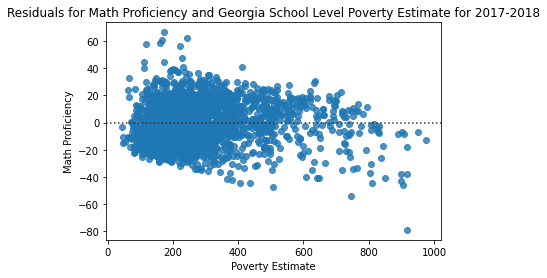

In [25]:
sns.residplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = an_final_math_GA)
plt.title('Residuals for Math Proficiency and Georgia School Level Poverty Estimate for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [29]:
model = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = an_final_math_GA).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.368
Model:                                     OLS   Adj. R-squared:                  0.368
Method:                          Least Squares   F-statistic:                     1279.
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):          4.13e-221
Time:                                 20:02:13   Log-Likelihood:                -9124.7
No. Observations:                         2198   AIC:                         1.825e+04
Df Residuals:                             2196   BIC:                         1.826e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
model.pvalues[0]

2.3646476042433436e-129

In [32]:
r, p_val = st.pearsonr(an_final_math_GA['IPR_EST'], an_final_math_GA['Clean_ALL_MTH00PCTPROF_1718'])

print(r)

0.6066510454948288


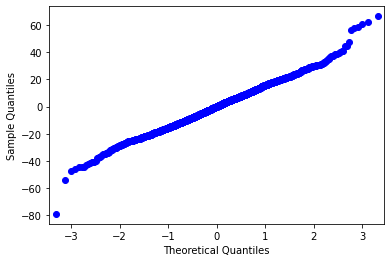

In [33]:
res = model.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [34]:
an_final_math_GA['IPR_EST_bin'] = pd.cut(an_final_math_GA['IPR_EST'], np.arange(min(an_final_math_GA['IPR_EST']), max(an_final_math_GA['IPR_EST']), step=200)) #Create a new column that bins the IPR_EST in 200 ranges to use for hue analysis in lmplot
print(an_final_math_GA['IPR_EST_bin'])

0        (43, 243]
1       (243, 443]
2        (43, 243]
3        (43, 243]
4       (243, 443]
           ...    
2201     (43, 243]
2202    (243, 443]
2203    (243, 443]
2204    (243, 443]
2205    (243, 443]
Name: IPR_EST_bin, Length: 2198, dtype: category
Categories (4, interval[int64]): [(43, 243] < (243, 443] < (443, 643] < (643, 843]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


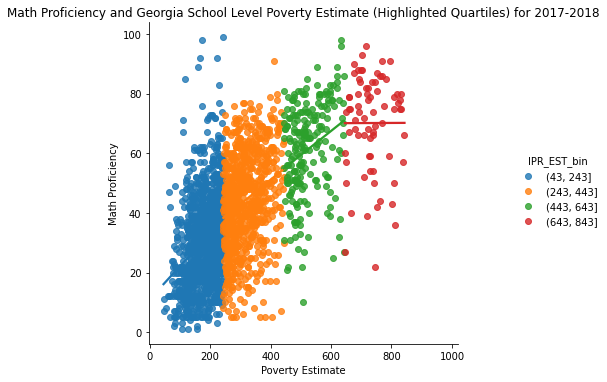

In [35]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = an_final_math_GA, hue = 'IPR_EST_bin', ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate (Highlighted Quartiles) for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [36]:
an_final_math_GA.describe()

,NCESSCH,IPR_EST,IPR_SE,Clean_ALL_MTH00PCTPROF_1718
count,2.198000e+03,2198.000000,2198.000000,2198.000000
mean,1.302331e+11,282.064149,74.677889,39.881256
std,1.472573e+08,151.169301,37.240047,19.338444
min,1.300001e+11,43.000000,14.000000,1.000000
25%,1.301230e+11,179.000000,47.000000,25.000000
50%,1.302220e+11,241.000000,68.000000,39.000000
75%,1.303300e+11,337.000000,95.000000,52.000000
max,1.305850e+11,975.000000,252.000000,99.000000


In [37]:
condition_IPR_EST_1Q = an_final_math_GA['IPR_EST'] < 243

df1 = an_final_math_GA[condition_IPR_EST_1Q]

df1.shape

(1110, 11)

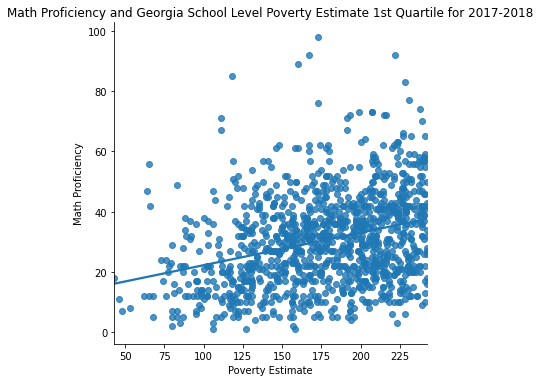

In [38]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = df1, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate 1st Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [39]:
model_df1 = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = df1).fit()

print(model_df1.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.091
Model:                                     OLS   Adj. R-squared:                  0.091
Method:                          Least Squares   F-statistic:                     111.5
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           6.82e-25
Time:                                 20:35:48   Log-Likelihood:                -4558.3
No. Observations:                         1110   AIC:                             9121.
Df Residuals:                             1108   BIC:                             9131.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
r, p_val = st.pearsonr(df1['IPR_EST'], df1['Clean_ALL_MTH00PCTPROF_1718'])

print(r)

0.30232346308180663


In [41]:
condition_IPR_EST_2Q = (an_final_math_GA['IPR_EST'] >= 243) & (an_final_math_GA['IPR_EST'] < 443)

df2 = an_final_math_GA[condition_IPR_EST_2Q]

df2.shape

(788, 11)

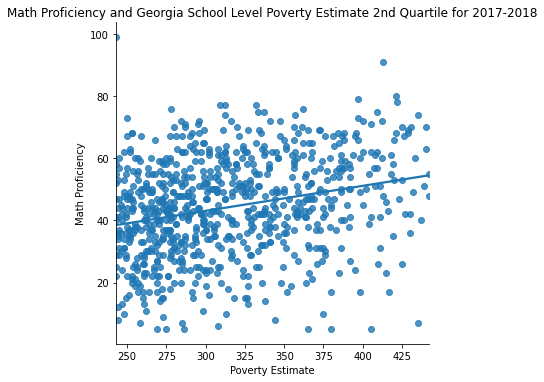

In [42]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = df2, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate 2nd Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [43]:
model_df2 = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = df2).fit()

print(model_df2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.067
Model:                                     OLS   Adj. R-squared:                  0.066
Method:                          Least Squares   F-statistic:                     56.31
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           1.68e-13
Time:                                 20:35:57   Log-Likelihood:                -3264.5
No. Observations:                          788   AIC:                             6533.
Df Residuals:                              786   BIC:                             6542.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
r, p_val = st.pearsonr(df2['IPR_EST'], df2['Clean_ALL_MTH00PCTPROF_1718'])

print(r)

0.25854961315506747


In [90]:
condition_IPR_EST_3Q = (an_final_math_GA['IPR_EST'] >= 443) & (an_final_math_GA['IPR_EST'] < 643)

df3 = an_final_math_GA[condition_IPR_EST_3Q]

df3.shape

(214, 11)

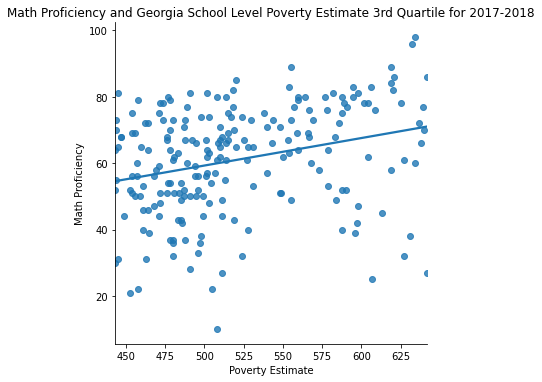

In [91]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = df3, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate 3rd Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [92]:
model_df3 = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = df3).fit()

print(model_df3.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.076
Method:                          Least Squares   F-statistic:                     18.57
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           2.51e-05
Time:                                 20:45:24   Log-Likelihood:                -889.23
No. Observations:                          214   AIC:                             1782.
Df Residuals:                              212   BIC:                             1789.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [93]:
r, p_val = st.pearsonr(df3['IPR_EST'], df3['Clean_ALL_MTH00PCTPROF_1718'])

print(r)

0.2837976490133006


In [94]:
condition_IPR_EST_4Q = an_final_math_GA['IPR_EST'] >= 643

df4 = an_final_math_GA[condition_IPR_EST_4Q]

df4.shape

(86, 11)

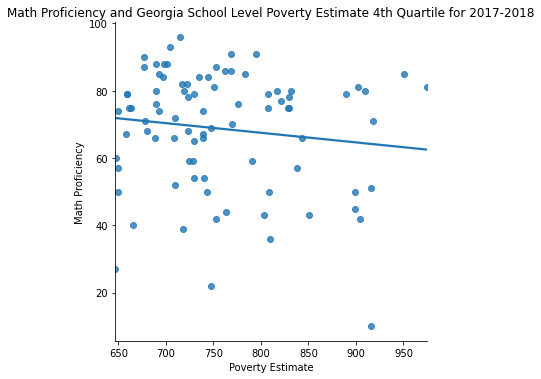

In [95]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = df4, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate 4th Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [51]:
model_df4 = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = df4).fit()

print(model_df4.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.017
Model:                                     OLS   Adj. R-squared:                  0.005
Method:                          Least Squares   F-statistic:                     1.467
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):              0.229
Time:                                 20:36:44   Log-Likelihood:                -367.64
No. Observations:                           86   AIC:                             739.3
Df Residuals:                               84   BIC:                             744.2
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
r, p_val = st.pearsonr(df4['IPR_EST'], df4['Clean_ALL_MTH00PCTPROF_1718'])

print(r)

-0.13101248212482816


In [53]:
condition_IPR_EST_1_2_3Q = an_final_math_GA['IPR_EST'] < 643

df5 = an_final_math_GA[condition_IPR_EST_1_2_3Q]

df5.shape

(2112, 11)

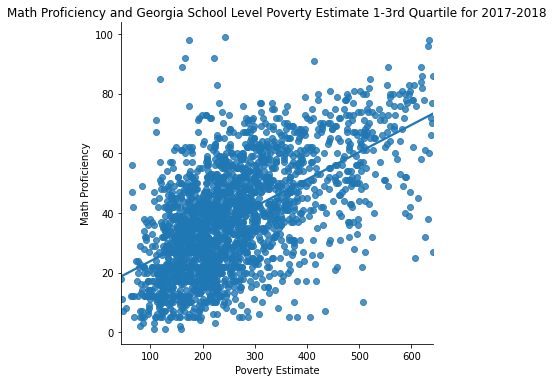

In [54]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_MTH00PCTPROF_1718', data = df5, ci = None, fit_reg = True)
plt.title('Math Proficiency and Georgia School Level Poverty Estimate 1-3rd Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Math Proficiency')

plt.show()

In [55]:
model_df5 = ols('Clean_ALL_MTH00PCTPROF_1718 ~ IPR_EST', data = df5).fit()

print(model_df5.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_MTH00PCTPROF_1718   R-squared:                       0.340
Model:                                     OLS   Adj. R-squared:                  0.340
Method:                          Least Squares   F-statistic:                     1088.
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):          8.73e-193
Time:                                 20:37:00   Log-Likelihood:                -8717.0
No. Observations:                         2112   AIC:                         1.744e+04
Df Residuals:                             2110   BIC:                         1.745e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
r, p_val = st.pearsonr(df5['IPR_EST'], df5['Clean_ALL_MTH00PCTPROF_1718'])

print(r, p_val)

0.5832820482453289 8.729626727366442e-193


In [59]:
final_rla_GA = pd.merge(rla_GA, poverty_nat, how = 'inner', on = 'NCESSCH') #Combine Georgia schools Reading Language Achievements with Poverty Estimates for 2017-2018

final_rla_GA.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718,MAM_RLA00NUMVALID_1718,MAM_RLA00PCTPROF_1718,MAS_RLA00NUMVALID_1718,MAS_RLA00PCTPROF_1718,MBL_RLA00NUMVALID_1718,MBL_RLA00PCTPROF_1718,MHI_RLA00NUMVALID_1718,MHI_RLA00PCTPROF_1718,MTR_RLA00NUMVALID_1718,MTR_RLA00PCTPROF_1718,MWH_RLA00NUMVALID_1718,MWH_RLA00PCTPROF_1718,F_RLA00NUMVALID_1718,F_RLA00PCTPROF_1718,M_RLA00NUMVALID_1718,M_RLA00PCTPROF_1718,CWD_RLA00NUMVALID_1718,CWD_RLA00PCTPROF_1718,ECD_RLA00NUMVALID_1718,ECD_RLA00PCTPROF_1718,FCS_RLA00NUMVALID_1718,FCS_RLA00PCTPROF_1718,LEP_RLA00NUMVALID_1718,LEP_RLA00PCTPROF_1718,HOM_RLA00NUMVALID_1718,HOM_RLA00PCTPROF_1718,MIG_RLA00NUMVALID_1718,MIG_RLA00PCTPROF_1718,MIL_RLA00NUMVALID_1718,...,HOM_RLA08PCTPROF_1718,HOM_RLAHSNUMVALID_1718,HOM_RLAHSPCTPROF_1718,MIG_RLA03NUMVALID_1718,MIG_RLA03PCTPROF_1718,MIG_RLA04NUMVALID_1718,MIG_RLA04PCTPROF_1718,MIG_RLA05NUMVALID_1718,MIG_RLA05PCTPROF_1718,MIG_RLA06NUMVALID_1718,MIG_RLA06PCTPROF_1718,MIG_RLA07NUMVALID_1718,MIG_RLA07PCTPROF_1718,MIG_RLA08NUMVALID_1718,MIG_RLA08PCTPROF_1718,MIG_RLAHSNUMVALID_1718,MIG_RLAHSPCTPROF_1718,MIL_RLA03NUMVALID_1718,MIL_RLA03PCTPROF_1718,MIL_RLA04NUMVALID_1718,MIL_RLA04PCTPROF_1718,MIL_RLA05NUMVALID_1718,MIL_RLA05PCTPROF_1718,MIL_RLA06NUMVALID_1718,MIL_RLA06PCTPROF_1718,MIL_RLA07NUMVALID_1718,MIL_RLA07PCTPROF_1718,MIL_RLA08NUMVALID_1718,MIL_RLA08PCTPROF_1718,MIL_RLAHSNUMVALID_1718,MIL_RLAHSPCTPROF_1718,X,Y,NAME,IPR_EST,IPR_SE,OBJECTID_1,LAT,LON,SCHOOLYEAR
0,GEORGIA,13,1300001,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,27MAR19,908,30,2,PS,23,40-59,436,17,82,20-24,35,30-39,330,47,454,37,454,22,87,25-29,627,20,1,PS,32,LE10,16,LE20,2,PS,NaN,...,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.984392,33.068221,Gardner-Newman Middle School,206,56,24088,33.068221,-84.984392,2017-2018
1,GEORGIA,13,1300001,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,27MAR19,294,55,1,PS,8,GE50,57,20-29,38,30-39,11,LT50,179,65-69,141,50-54,153,55-59,46,40-49,118,30-34,1,PS,19,LE20,5,PS,2,PS,NaN,...,NaN,NaN,NaN,NaN,NaN,2,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.056615,33.055284,Hollis Hand Elementary School,356,88,24089,33.055284,-85.056615,2017-2018
2,GEORGIA,13,1300001,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,27MAR19,243,35,1,PS,9,LT50,121,15-19,16,21-39,11,LT50,85,55-59,124,35-39,119,30-34,23,21-39,141,20-24,2,PS,2,PS,1,PS,NaN,NaN,NaN,...,NaN,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.034401,33.046046,LaGrange High School,178,43,24090,33.046046,-85.034401,2017-2018
3,GEORGIA,13,1300001,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,27MAR19,163,6-9,NaN,NaN,NaN,NaN,149,6-9,2,PS,7,LT50,5,PS,73,10-14,90,6-9,18,LE20,163,6-9,NaN,NaN,1,PS,1,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.045694,33.021475,Berta Weathersbee Elementary School,122,23,24091,33.021475,-85.045694,2017-2018
4,GEORGIA,13,1300001,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,27MAR19,194,35-39,NaN,NaN,11,GE50,28,LE20,11,LT50,8,LT50,136,35-39,97,35-39,97,30-34,27,LE20,93,25-29,6,GE50,2,PS,2,PS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.038241,33.122700,Hillcrest Elementary School,368,115,24092,33.122700,-85.038241,2017-2018


In [60]:
final_rla_GA.shape

(2197, 274)

In [61]:
an_final_rla_GA = final_rla_GA[['ST_LEAID', 'LEANM', 'NCESSCH', 'ST_SCHID',	'SCHNAM', 'ALL_RLA00PCTPROF_1718', 'NAME', 'IPR_EST',	'IPR_SE']] #Isolate columns for analysis in the Final DataFrame for Georgia schools Reading Language Achievements with Poverty Estimates for 2017-2018
 
an_final_rla_GA.head()

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_RLA00PCTPROF_1718,NAME,IPR_EST,IPR_SE
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,30,Gardner-Newman Middle School,206,56
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,55,Hollis Hand Elementary School,356,88
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,35,LaGrange High School,178,43
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,35-39,Hillcrest Elementary School,368,115


In [62]:
an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'] = an_final_rla_GA['ALL_RLA00PCTPROF_1718']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
an_final_rla_GA.head()

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_RLA00PCTPROF_1718,NAME,IPR_EST,IPR_SE,Clean_ALL_RLA00PCTPROF_1718
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,30,Gardner-Newman Middle School,206,56,30
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,55,Hollis Hand Elementary School,356,88,55
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,35,LaGrange High School,178,43,35
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23,6-9
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,35-39,Hillcrest Elementary School,368,115,35-39


In [64]:
with pd.option_context('display.max_rows', 2197):
    print (an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'].value_counts())


39       50
31       49
15-19    44
28       44
33       43
45       42
40       42
41       41
35       41
43       40
34       40
36       40
30       39
37       39
26       38
29       37
32       37
30-34    37
38       37
42       36
20-24    36
44       35
25-29    35
25       34
24       33
20       33
49       33
40-44    32
22       32
35-39    30
46       30
50       29
54       28
10-14    28
47       27
55       26
23       26
53       26
27       26
56       25
16       25
18       25
14       24
51       24
19       24
61       23
48       22
59       22
63       21
58       21
62       21
45-49    21
15       20
57       20
21       20
LE20     19
17       19
52       18
6-9      18
68       18
60       17
55-59    14
8        14
77       14
LT50     13
65       13
13       12
67       12
11       11
64       10
71       10
LE10     10
66       10
75        9
76        9
50-54     9
73        9
60-64     8
10        8
LE5       8
12        7
80        7
79        7
PS  

In [65]:
an_final_rla_GA.drop(an_final_rla_GA[an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'] == 'PS'].index, inplace = True)  #clean 'PS' values by dropping observations with 'PS' in the Clean_ALL_RLA00PCTPROF_1718 column
                                                    

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
an_final_rla_GA[an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'] == 'PS'].count() #Check that 'PS' values were dropped

ST_LEAID                       0
LEANM                          0
NCESSCH                        0
ST_SCHID                       0
SCHNAM                         0
ALL_RLA00PCTPROF_1718          0
NAME                           0
IPR_EST                        0
IPR_SE                         0
Clean_ALL_RLA00PCTPROF_1718    0
dtype: int64

In [68]:
an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'].isna().sum() #Check for NaN values in the in the Clean_ALL_RLA00PCTPROF_1718 column

0

In [69]:
an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'] = an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'].apply(clean_data) # Apply Cleaning Function to the Clean_ALL_RLA00PCTPROF_1718 column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
an_final_rla_GA.head(50)

,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,ALL_RLA00PCTPROF_1718,NAME,IPR_EST,IPR_SE,Clean_ALL_RLA00PCTPROF_1718
0,GA-741,Troup County,130000100593,GA-741-0191,Gardner-Newman Middle School,30,Gardner-Newman Middle School,206,56,30
1,GA-741,Troup County,130000100596,GA-741-0194,Hollis Hand Elementary School,55,Hollis Hand Elementary School,356,88,55
2,GA-741,Troup County,130000100608,GA-741-1052,LaGrange High School,35,LaGrange High School,178,43,35
3,GA-741,Troup County,130000100643,GA-741-5052,Berta Weathersbee Elementary School,6-9,Berta Weathersbee Elementary School,122,23,7
4,GA-741,Troup County,130000101706,GA-741-3050,Hillcrest Elementary School,35-39,Hillcrest Elementary School,368,115,37
5,GA-741,Troup County,130000101710,GA-741-5050,Rosemont Elementary School,41,Rosemont Elementary School,307,86,41
6,GA-741,Troup County,130000101852,GA-741-0297,Long Cane Middle School,30,Long Cane Middle School,182,71,30
7,GA-741,Troup County,130000101853,GA-741-0397,Hogansville Elementary School,17,Hogansville Elementary School,188,67,17
8,GA-741,Troup County,130000101855,GA-741-0497,Whitesville Road Elementary School,20,Whitesville Road Elementary School,124,51,20
9,GA-741,Troup County,130000101856,GA-741-0597,Ethel W. Kight Elementary School,18,Ethel W. Kight Elementary School,157,30,18


In [72]:
an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'].dtypes

dtype('int64')

In [73]:
an_final_rla_GA['IPR_EST'].dtypes

dtype('int64')

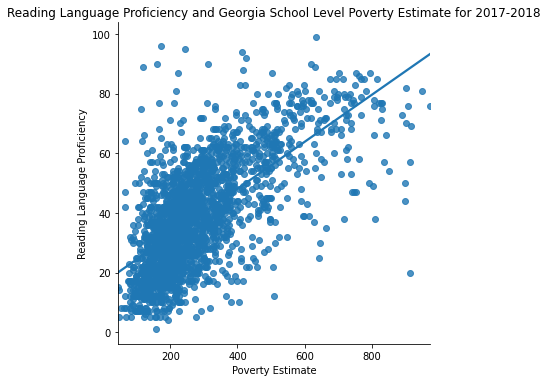

In [74]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = an_final_rla_GA, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [75]:
model_rla = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = an_final_rla_GA).fit()

print(model_rla.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.442
Model:                                     OLS   Adj. R-squared:                  0.442
Method:                          Least Squares   F-statistic:                     1735.
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):          8.99e-280
Time:                                 20:39:16   Log-Likelihood:                -8786.9
No. Observations:                         2190   AIC:                         1.758e+04
Df Residuals:                             2188   BIC:                         1.759e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
r, p_val = st.pearsonr(an_final_rla_GA['IPR_EST'], an_final_rla_GA['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

0.6650716180595486


In [77]:
an_final_rla_GA['IPR_EST_bin'] = pd.cut(an_final_rla_GA['IPR_EST'], np.arange(min(an_final_rla_GA['IPR_EST']), max(an_final_rla_GA['IPR_EST']), step=200)) #Create a new column that bins the IPR_EST in 200 ranges to use for hue analysis in lmplot
print(an_final_rla_GA['IPR_EST_bin'])

0        (43, 243]
1       (243, 443]
2        (43, 243]
3        (43, 243]
4       (243, 443]
           ...    
2191    (243, 443]
2192     (43, 243]
2193    (243, 443]
2194    (243, 443]
2195    (243, 443]
Name: IPR_EST_bin, Length: 2190, dtype: category
Categories (4, interval[int64]): [(43, 243] < (243, 443] < (443, 643] < (643, 843]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


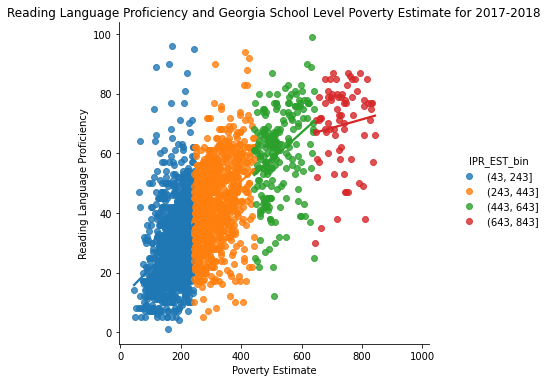

In [78]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = an_final_rla_GA, hue = 'IPR_EST_bin', ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [79]:
condition_IPR_EST_1Q = an_final_rla_GA['IPR_EST'] < 243

df1_rla = an_final_rla_GA[condition_IPR_EST_1Q]

df1_rla.shape

(1105, 11)

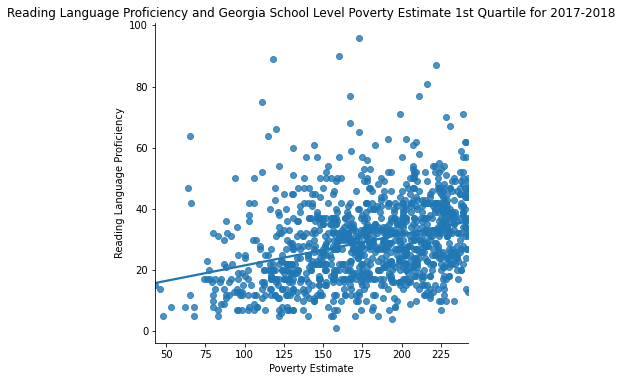

In [80]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = df1_rla, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate 1st Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [81]:
model_rla_1Q = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = df1_rla).fit()

print(model_rla_1Q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.104
Model:                                     OLS   Adj. R-squared:                  0.103
Method:                          Least Squares   F-statistic:                     127.5
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           4.58e-28
Time:                                 20:44:06   Log-Likelihood:                -4384.7
No. Observations:                         1105   AIC:                             8773.
Df Residuals:                             1103   BIC:                             8783.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
r, p_val = st.pearsonr(df1_rla['IPR_EST'], df1_rla['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

0.3219495098011864


In [83]:
condition_IPR_EST_2Q = (an_final_rla_GA['IPR_EST'] >= 243) & (an_final_rla_GA['IPR_EST'] < 443)

df2_rla = an_final_rla_GA[condition_IPR_EST_2Q]

df2_rla.shape

(785, 11)

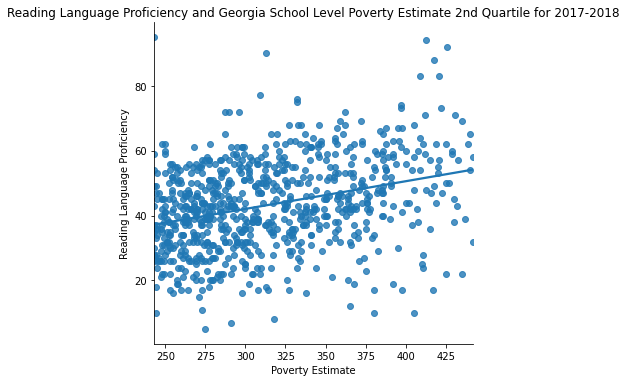

In [84]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = df2_rla, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate 2nd Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [85]:
model_rla_2Q = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = df2_rla).fit()

print(model_rla_2Q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.098
Model:                                     OLS   Adj. R-squared:                  0.097
Method:                          Least Squares   F-statistic:                     85.37
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           2.29e-19
Time:                                 20:44:18   Log-Likelihood:                -3133.2
No. Observations:                          785   AIC:                             6270.
Df Residuals:                              783   BIC:                             6280.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [86]:
r, p_val = st.pearsonr(df2_rla['IPR_EST'], df2_rla['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

0.3135380527964855


In [87]:
condition_IPR_EST_3Q = (an_final_rla_GA['IPR_EST'] >= 443) & (an_final_rla_GA['IPR_EST'] < 643)

df3_rla = an_final_rla_GA[condition_IPR_EST_3Q]

df3_rla.shape

(214, 11)

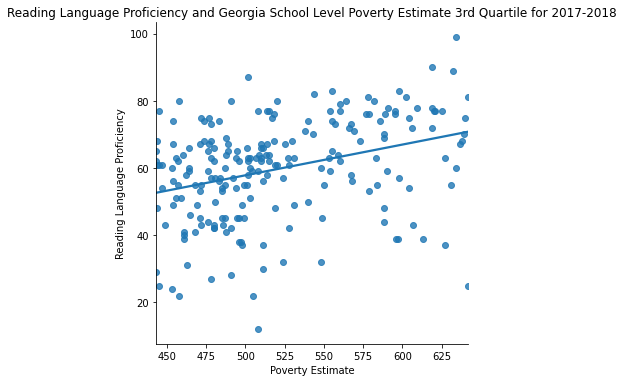

In [88]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = df3_rla, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate 3rd Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [96]:
model_rla_3Q = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = df3_rla).fit()

print(model_rla_3Q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.114
Model:                                     OLS   Adj. R-squared:                  0.110
Method:                          Least Squares   F-statistic:                     27.23
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):           4.29e-07
Time:                                 20:46:06   Log-Likelihood:                -869.55
No. Observations:                          214   AIC:                             1743.
Df Residuals:                              212   BIC:                             1750.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
r, p_val = st.pearsonr(df3_rla['IPR_EST'], df3_rla['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

0.3373908594106653


In [98]:
condition_IPR_EST_4Q = an_final_rla_GA['IPR_EST'] >= 643

df4_rla = an_final_rla_GA[condition_IPR_EST_4Q]

df4_rla.shape

(86, 11)

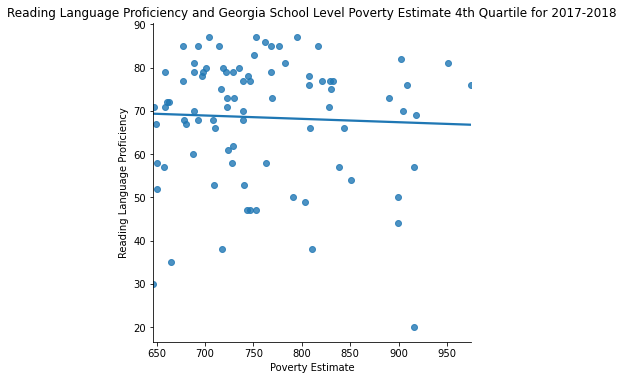

In [100]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = df4_rla, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate 4th Quartile for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [101]:
model_rla_4Q = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = df4_rla).fit()

print(model_rla_4Q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.002
Model:                                     OLS   Adj. R-squared:                 -0.010
Method:                          Least Squares   F-statistic:                    0.1597
Date:                         Sat, 06 Mar 2021   Prob (F-statistic):              0.690
Time:                                 20:46:41   Log-Likelihood:                -351.09
No. Observations:                           86   AIC:                             706.2
Df Residuals:                               84   BIC:                             711.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
r, p_val = st.pearsonr(df4_rla['IPR_EST'], df4_rla['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

-0.043560991567973176


In [ ]:
condition_IPR_EST_1_2_3Q = an_final_rla_GA['IPR_EST'] < 643

df5_rla = an_final_rla_GA[condition_IPR_EST_1_2_3Q]

df5_rla.shape

(2104, 11)

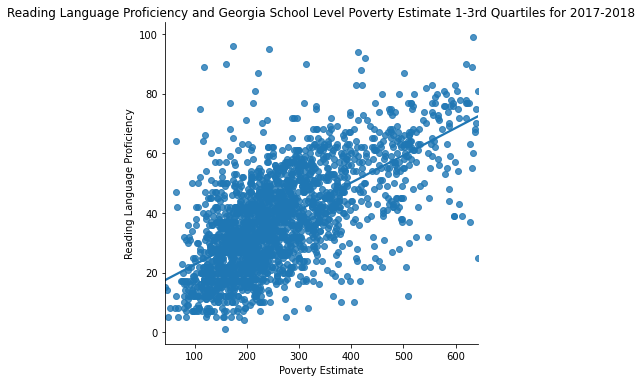

In [ ]:
sns.lmplot(x = 'IPR_EST', y = 'Clean_ALL_RLA00PCTPROF_1718', data = df5_rla, ci = None, fit_reg = True)
plt.title('Reading Language Proficiency and Georgia School Level Poverty Estimate 1-3rd Quartiles for 2017-2018')
plt.xlabel('Poverty Estimate')
plt.ylabel('Reading Language Proficiency')

plt.show()

In [ ]:
model_rla_1_2_3Q = ols('Clean_ALL_RLA00PCTPROF_1718 ~ IPR_EST', data = df5_rla).fit()

print(model_rla_1_2_3Q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Clean_ALL_RLA00PCTPROF_1718   R-squared:                       0.406
Model:                                     OLS   Adj. R-squared:                  0.406
Method:                          Least Squares   F-statistic:                     1439.
Date:                         Thu, 04 Mar 2021   Prob (F-statistic):          2.59e-240
Time:                                 02:43:21   Log-Likelihood:                -8394.0
No. Observations:                         2104   AIC:                         1.679e+04
Df Residuals:                             2102   BIC:                         1.680e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
r, p_val = st.pearsonr(df5_rla['IPR_EST'], df5_rla['Clean_ALL_RLA00PCTPROF_1718'])

print(r)

0.637459072070291
